In [25]:
import numpy as np
import re

In [26]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [27]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences).lower()
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
words = sentences.split()
vocab = set(words)

In [28]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [29]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [30]:
data = [(words[i - 2:i] + words[i + 1:i + 3], words[i]) for i in range(2, len(words) - 2)]

In [31]:
embeddings = np.random.random_sample((vocab_size, embed_dim))

In [32]:
def linear(m, theta):
    return np.dot(m, theta)

In [33]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum(axis=-1, keepdims=True))

In [34]:
def NLLLoss(logs, targets):
    return -np.mean(logs[np.arange(len(targets)), targets])

In [35]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o

In [41]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    target_one_hot = np.zeros(o.shape)
    target_one_hot[np.arange(len(target_idxs)), target_idxs] = 1
    
    grad = np.dot(m.T, (o - target_one_hot))
    return grad


In [42]:
def optimize(theta, grad, lr=0.03):
    return theta - lr * grad

In [43]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
epoch_losses = []

In [44]:
for epoch in range(80):
    losses = []
    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)
        target_idx = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idx)
        losses.append(loss)
        
        grad = backward(preds, theta, target_idx)
        theta = optimize(theta, grad)
        
    epoch_losses.append(np.mean(losses))

Text(0.5, 1.0, 'Epoch Losses')

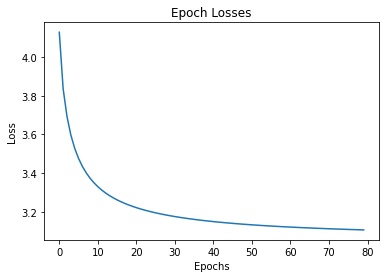

In [45]:
import matplotlib.pyplot as plt
plt.plot(np.arange(80), epoch_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch Losses')

In [46]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    return ix_to_word[np.argmax(preds[-1])]

In [47]:
print(predict(['we', 'are', 'to', 'study']))

about


In [48]:
def accuracy():
    wrong = 0
    for context, target in data:
        if predict(context) != target:
            wrong += 1
    return 1 - (wrong / len(data))

print(accuracy())

1.0
